
### SCCODA for BB data


Author : Asmita Lagwankar

This book explores the proportions within cell types and samples for the BB data. 

### Importing all important packages

In [143]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import warnings

from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

warnings.filterwarnings("ignore")
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz


In [144]:
adata = ad.read_h5ad("adata_bb_30kgenes.h5ad")
print(adata)


AnnData object with n_obs × n_vars = 33674 × 32471
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'cond', 'pct_mt', 'RNA_snn_res.1.3', 'seurat_clusters', 'seuratclusters53', 'RNA_snn_res.0.02', 'seuratclusters15', 'RNA_snn_res.0.018', 'RNA_snn_res.0.015', 'seuratclusters14', 'subsample', 'sub', 'p', 'depth', 'gsi', 'good_names', 'good15_names', 'good_names_num', 'cc', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'cyto', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced', 'velocity_self_transition', 'demux', 'trial_id', 'pid', 'build_15_45', 'build_25_55', 'build_35_65', 'build_45_75', 'build_5_35', 'build_55_85', 'build_65_95', 'depth_15_45', 'depth_25_55', 'depth_35_65', 'depth_45_75', 'depth_5_35', 'depth_55_85', 'depth_65_95', 'spawn_15_45', 'spawn_25_55', 'spawn_35_65', 'spawn_45_75', 'spawn_5_35', 'spawn_55_85', 'spawn_65_95', 'ieg_score', 'neurogen_score', 'fst_score', 'pair', 'build_events', 'spawn_events', 'standard_length', 'run', 'build_35_75', 

In [145]:
adata.obs['sample']

BHVE_AAACCCACACAATCTG-1_1     b1
BHVE_AAACCCATCGGACGTC-1_1     b1
BHVE_AAACGAAGTAGAAACT-1_1     b1
BHVE_AAACGAATCTAACGGT-1_1     b1
BHVE_AAACGCTCACGATTCA-1_1     b1
                              ..
CTRL_TTTGTTGCAGTAACCT-1_10    c5
CTRL_TTTGTTGTCACTACGA-1_10    c5
CTRL_TTTGTTGTCATCACTT-1_10    c5
CTRL_TTTGTTGTCCAAGCTA-1_10    c5
CTRL_TTTGTTGTCCTGGTCT-1_10    c5
Name: sample, Length: 33674, dtype: category
Categories (10, object): ['b1', 'b2', 'b3', 'b4', ..., 'c2', 'c3', 'c4', 'c5']

In [107]:
pd.crosstab(adata.obs['subsample'], adata.obs['good_names'])

good_names,1.1_Astro,1.2_Astro,1.3_MG,2.1_OPC,2.2_Oligo,3_Peri,4.1_GABA,4.2_GABA,4.3_GABA,4.4_GABA,...,12_Glut,13_Glut,14_Glut,15.1_GABA/Glut,15.2_GABA,15.3_GABA,15.4_GABA,15.5_GABA/Glut,15.6_Glut,15.7_Glut
subsample,,,,,,,,,,,,,,,,,,,,,
b1.1,41,26,6,9,4,1,49,19,15,7,...,10,13,11,40,26,7,6,10,4,2
b1.2,35,15,6,9,6,3,46,23,16,18,...,11,5,9,31,19,4,7,5,4,1
b1.3,34,28,7,14,6,0,28,13,16,19,...,10,12,8,42,34,13,4,9,4,2
b1.4,35,18,3,8,4,2,30,21,14,22,...,17,11,3,23,26,10,6,2,6,0
b2.1,47,14,11,8,8,2,32,14,13,19,...,7,15,11,24,19,7,17,8,2,0
b2.2,34,22,11,13,6,0,42,22,8,9,...,17,4,0,20,25,6,9,4,7,1
b2.3,44,9,5,12,1,0,42,33,21,14,...,18,7,8,30,20,8,8,6,3,1
b2.4,39,23,6,9,9,1,60,20,19,17,...,16,4,2,22,26,9,11,0,5,0
b3.1,22,8,4,8,3,1,36,4,15,22,...,7,7,4,26,23,15,3,4,5,0


### Revised Function for Boxplots(Helps keep the scale similar in all plots)

In [187]:
#new function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, List, Tuple
from anndata import AnnData

def boxplots(
        data: AnnData,
        feature_name: str,
        y_scale: str = "relative",
        plot_facets: bool = False,
        add_dots: bool = False,
        cell_types: Optional[list] = None,
        args_boxplot: Optional[dict] = {},
        args_swarmplot: Optional[dict] = {},
        figsize: Optional[Tuple[int, int]] = None,
        dpi: Optional[int] = 100,
        cmap: Optional[str] = "Blues",
        plot_legend: Optional[bool] = True,
        level_order: List[str] = None
) -> Optional[Tuple[plt.Subplot, sns.axisgrid.FacetGrid]]:
    """\
    Grouped boxplot visualization. The cell counts for each cell type are shown as a group of boxplots,
    with intra--group separation by a covariate from data.obs.

    The cell type groups can either be ordered along the x-axis of a single plot (plot_facets=False) or as plot facets (plot_facets=True).

    Parameters
    ----------
    data
        A scCODA-compatible data object
    feature_name
        The name of the feature in data.obs to plot
    y_scale
        Transformation to of cell counts. Options: "relative" - Relative abundance, "log" - log(count), "count" - absolute abundance (cell counts)
    plot_facets
        If False, plot cell types on the x-axis. If True, plot as facets
    add_dots
        If True, overlay a scatterplot with one dot for each data point
    cell_types
        Subset of cell types that should be plotted
    args_boxplot
        Arguments passed to sns.boxplot
    args_swarmplot
            Arguments passed to sns.swarmplot
    figsize
        figure size
    dpi
        dpi setting
    cmap
        The seaborn color map for the barplot
    plot_legend
        If True, adds a legend
    level_order
        Custom ordering of bars on the x-axis

    Returns
    -------
    Depending on `plot_facets`, returns a :class:`~plt.AxesSubplot` (`plot_facets = False`) or :class:`~sns.axisgrid.FacetGrid` (`plot_facets = True`) object

    ax
        if `plot_facets = False`
    g
        if `plot_facets = True`
    """

    # y scale transformations
    if y_scale == "relative":
        sample_sums = np.sum(data.X, axis=1, keepdims=True)
        X = data.X/sample_sums
        value_name = "Proportion"
    # add pseudocount 1 if using log scale (needs to be improved)
    elif y_scale == "log":
        X = np.log(data.X + 1)
        value_name = "log(count)"
    elif y_scale == "count":
        X = data.X
        value_name = "count"
    else:
        raise ValueError("Invalid y_scale transformation")

    count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
        merge(data.obs[feature_name], left_index=True, right_index=True)
    plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)
    if cell_types is not None:
        plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

    if plot_facets:

        if level_order is None:
            level_order = pd.unique(plot_df[feature_name])

        K = X.shape[1]

        g = sns.FacetGrid(
            plot_df,
            col="Cell type",
            sharey=False,
            col_wrap=int(np.floor(np.sqrt(K))),
            height=5,
            aspect=2,
        )
        g.map(
            sns.boxplot,
            feature_name,
            value_name,
            palette=cmap,
            order=level_order,
            **args_boxplot
        )

        if add_dots:

            if "hue" in args_swarmplot:
                hue = args_swarmplot.pop("hue")
            else:
                hue = None

            if hue is None:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    color="black",
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")
            else:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    hue,
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")

        # Set y-axis limits across all subplots
        if y_scale != "log":
            y_max = plot_df[value_name].max()
            y_min = plot_df[value_name].min()
            for ax in g.axes.flat:
                ax.set_ylim(y_min, y_max)

        return g

    else:

        if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

        sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
                    palette=cmap, ax=ax, **args_boxplot)

        if add_dots:
            sns.swarmplot(
                x="Cell type",
                y=value_name,
                data=plot_df,
                hue=feature_name,
                ax=ax,
                dodge=True,
                color="black",
                **args_swarmplot
            )

        cell_types = pd.unique(plot_df["Cell type"])
        ax.set_xticklabels(cell_types, rotation=90)

        if plot_legend:
            handles, labels = ax.get_legend_handles_labels()
            handout = []
            labelout = []
            for h, l in zip(handles, labels):
                if l not in labelout:
                    labelout.append(l)
                    handout.append(h)
            ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)

        # Set y-axis limits
        if y_scale != "log":
            ax.set_ylim(plot_df[value_name].min(), plot_df[value_name].max())

        plt.tight_layout()

        return ax


### Creating the first scCODA object per Sample as Condition

In [147]:
mapping = {"b1": 1, "b2": 2 ,"b3": 3, "b4": 4, "b5": 5, "c1": 6, "c2": 7, "c3": 8, "c4": 9, "c5": 10 }

# Replace the values in the "cond" column using the mapping dictionary
adata.obs["sample"] = adata.obs["sample"].replace(mapping)

In [148]:
adata.obs['cond']

BHVE_AAACCCACACAATCTG-1_1     BHVE
BHVE_AAACCCATCGGACGTC-1_1     BHVE
BHVE_AAACGAAGTAGAAACT-1_1     BHVE
BHVE_AAACGAATCTAACGGT-1_1     BHVE
BHVE_AAACGCTCACGATTCA-1_1     BHVE
                              ... 
CTRL_TTTGTTGCAGTAACCT-1_10    CTRL
CTRL_TTTGTTGTCACTACGA-1_10    CTRL
CTRL_TTTGTTGTCATCACTT-1_10    CTRL
CTRL_TTTGTTGTCCAAGCTA-1_10    CTRL
CTRL_TTTGTTGTCCTGGTCT-1_10    CTRL
Name: cond, Length: 33674, dtype: category
Categories (2, object): ['BHVE', 'CTRL']

In [149]:
cov_df = pd.DataFrame({"Cond": ["b1", "b2","b3","b4","b5","c1","c2","c3","c4","c5"]}, index=[1,2,3,4,5,6,7,8,9,10])
print(cov_df)

   Cond
1    b1
2    b2
3    b3
4    b4
5    b5
6    c1
7    c2
8    c3
9    c4
10   c5


In [150]:
data_scanpy_1 = dat.from_scanpy(
    adata,
    cell_type_identifier="good_names",
    sample_identifier="sample",
    covariate_df=cov_df
)

In [151]:
data_scanpy_1

AnnData object with n_obs × n_vars = 10 × 53
    obs: 'Cond'
    var: 'n_cells'

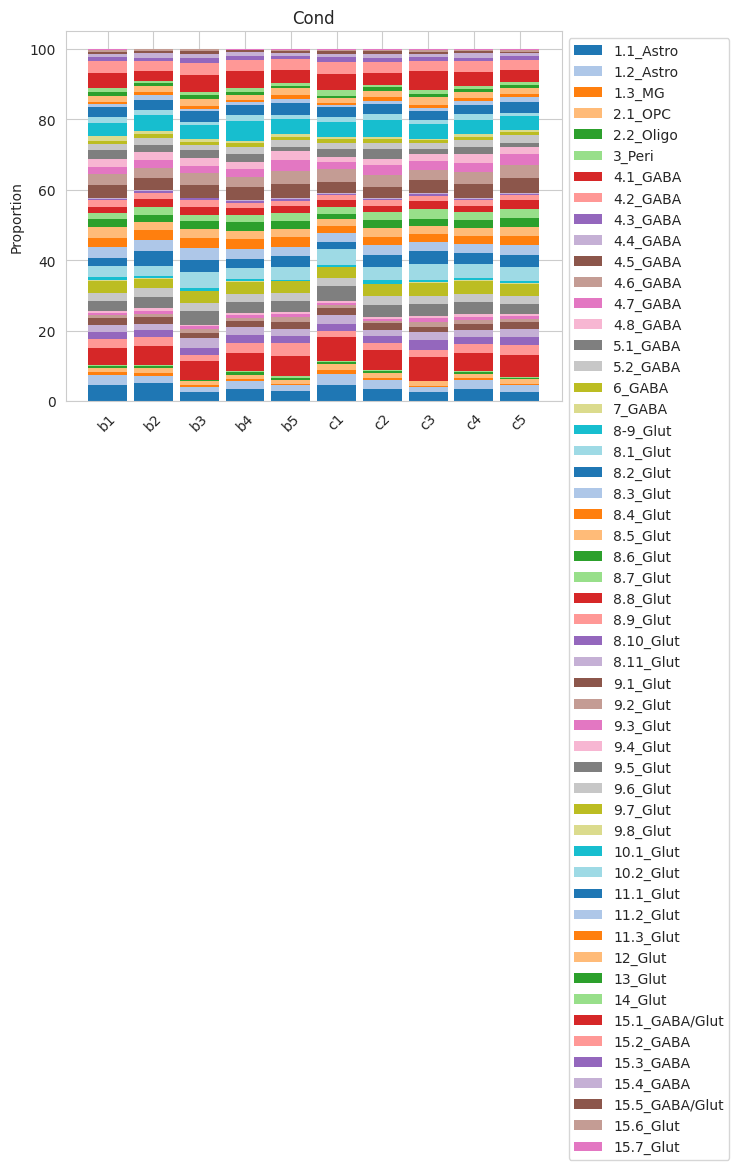

In [220]:
# Stacked barplot for each pool 
viz.stacked_barplot(data_scanpy_1, feature_name="Cond") 
plt.show()


<Figure size 640x480 with 0 Axes>

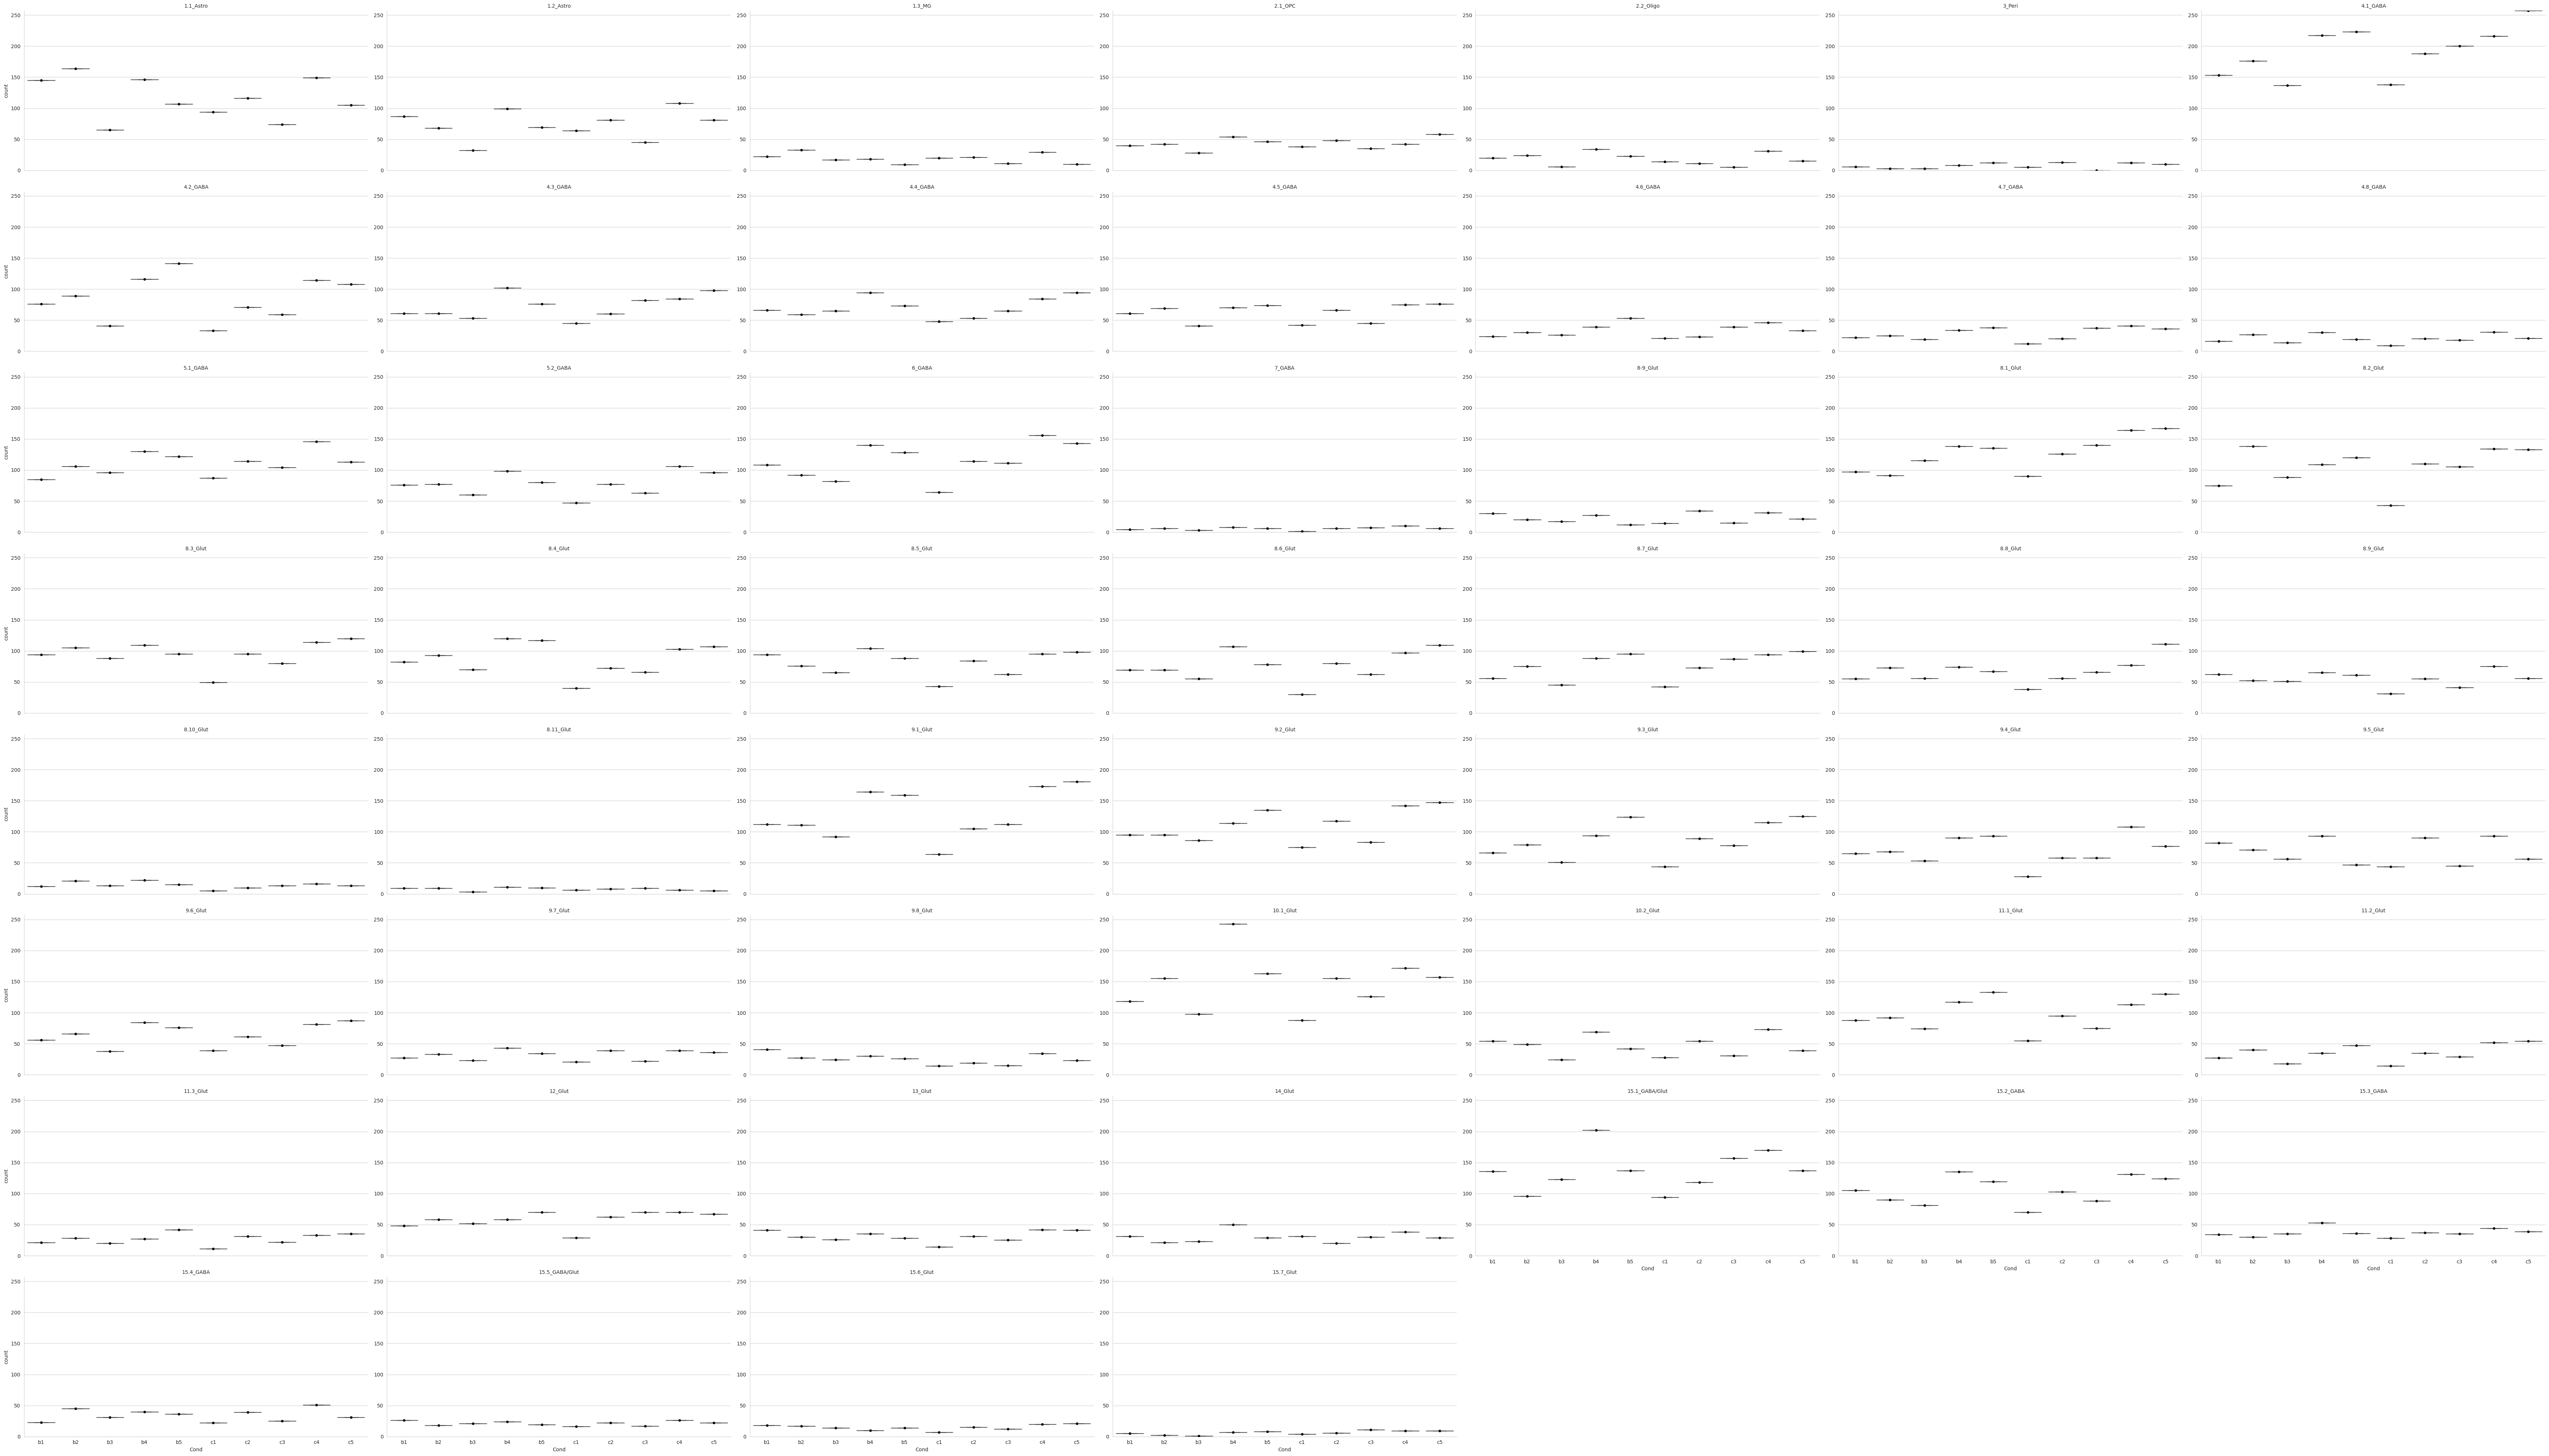

In [217]:
#Boxplots per cell type for every pool (sample) 
plt.savefig("Boxplots_perpool.jpg")
boxplots(data_scanpy_1,
    feature_name="Cond",
    plot_facets=True,
    y_scale="count",
    add_dots=True,
    cmap="Reds",
)

### Creating the second scCODA object per Behave/Control as Condition

In [154]:
#New mapping to see behave and control 
mapping = {"BHVE": 1, "CTRL": 2}

# Replace the values in the "cond" column using the mapping dictionary
adata.obs["cond"] = adata.obs["cond"].replace(mapping)


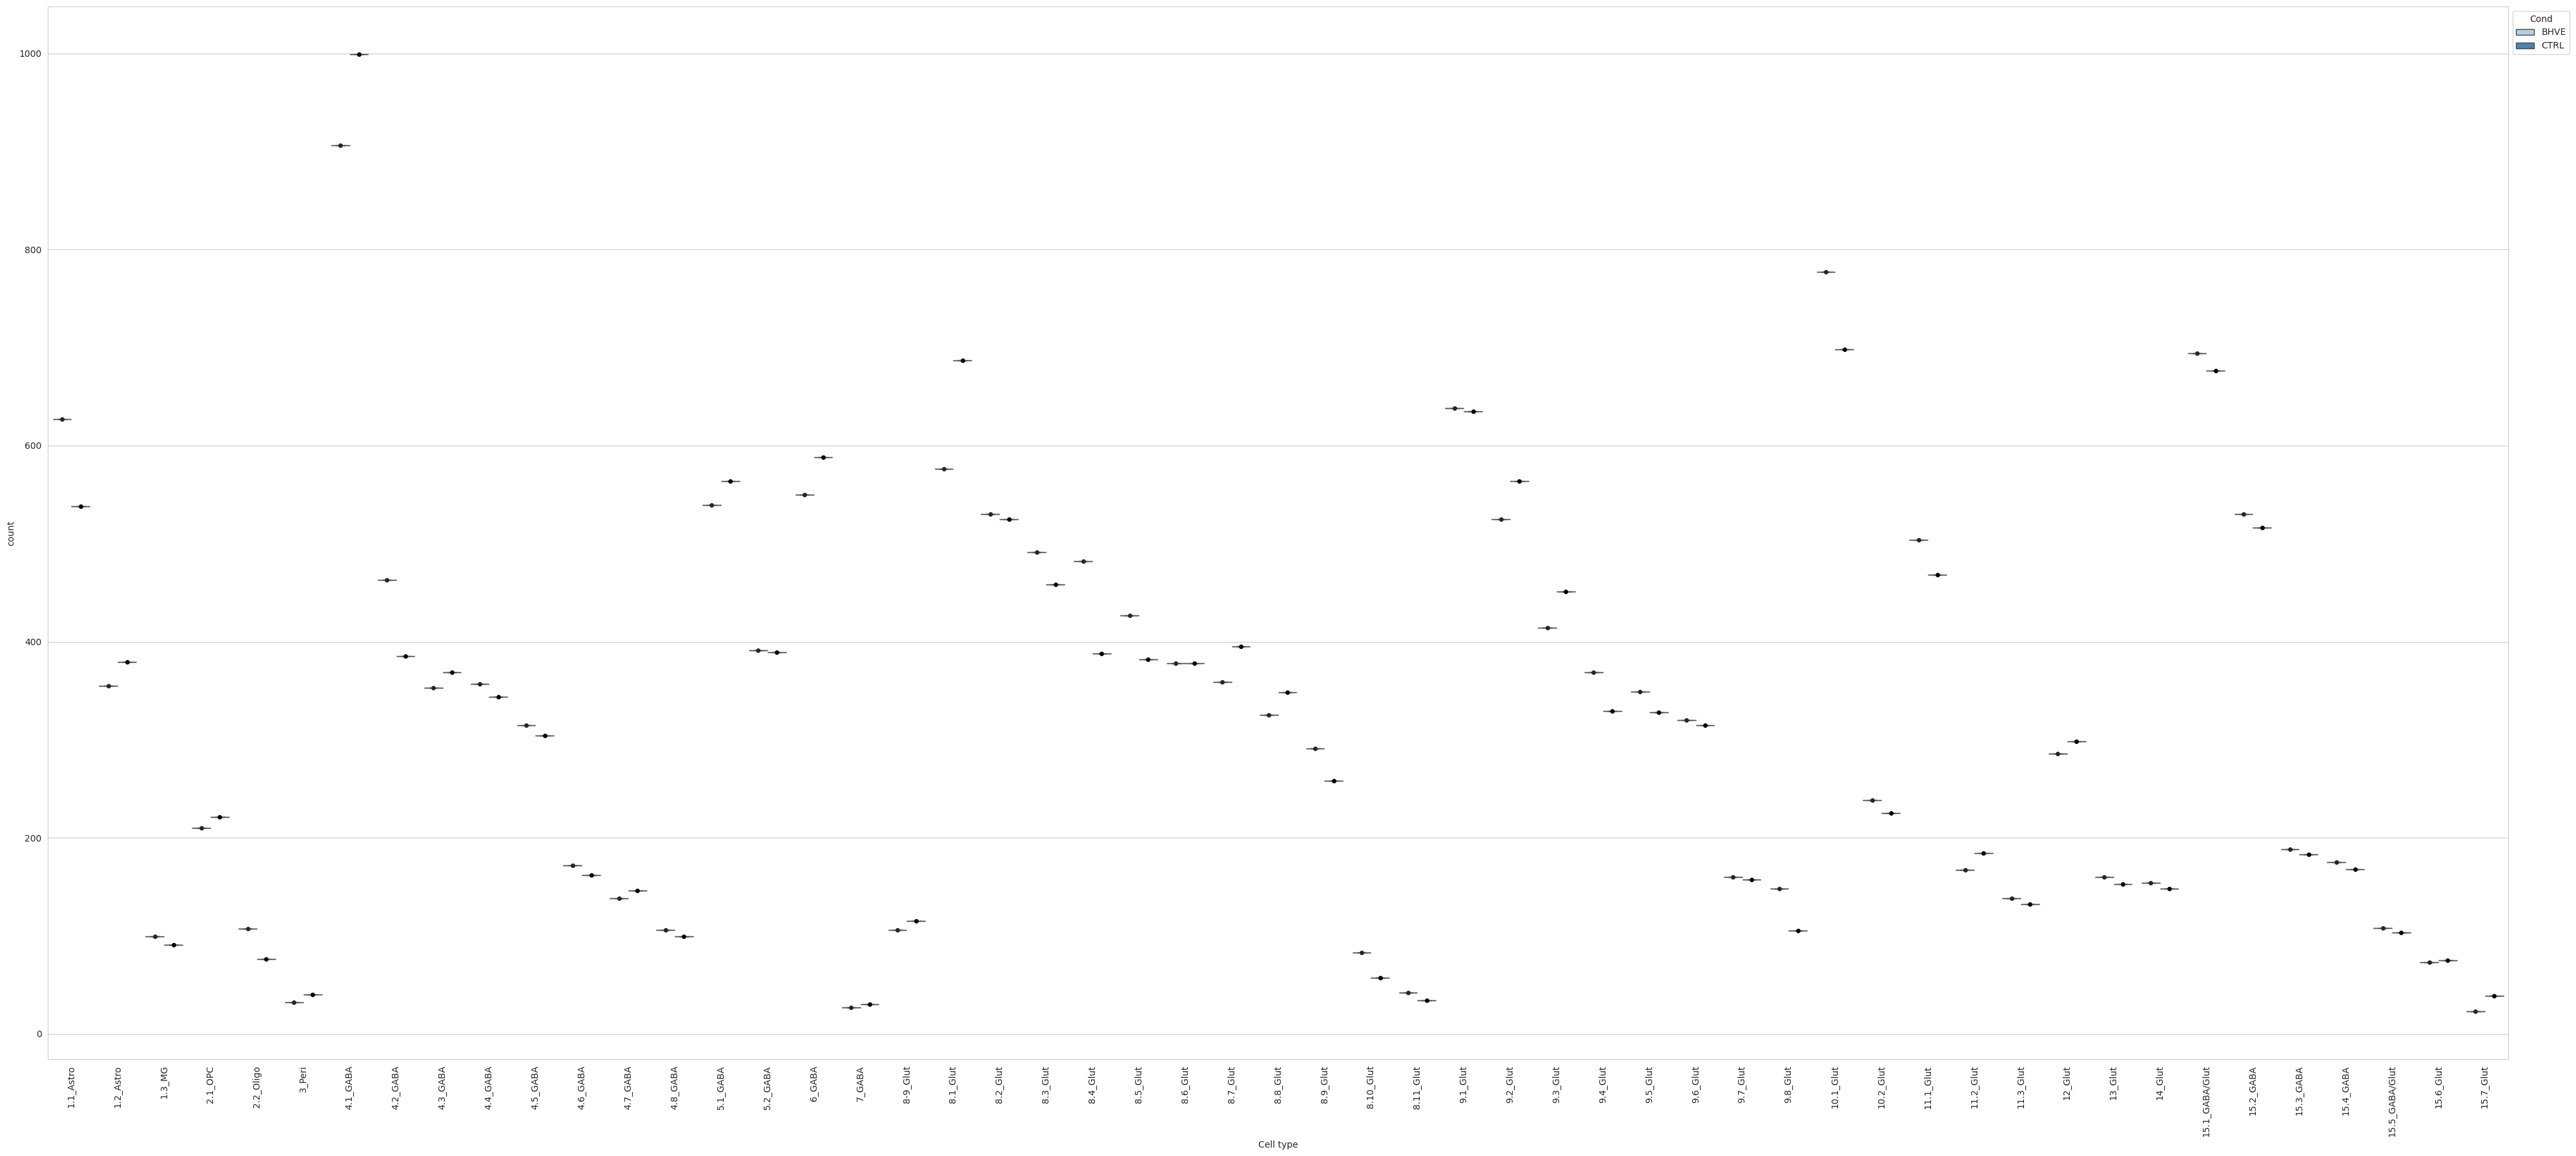

In [203]:
# Grouped boxplots. No facets, relative abundance, no dots.
viz.boxplots(
    data_scanpy_2,
    feature_name="Cond",
plot_facets=False,
    y_scale="count",
    add_dots= True,
    figsize= ([40,18])
)

plt.show()

In [155]:
cov_df_2 = pd.DataFrame({"Cond": ["BHVE", "CTRL"]}, index=[1,2])
print(cov_df_2)

   Cond
1  BHVE
2  CTRL


In [156]:
data_scanpy_2 = dat.from_scanpy(
    adata,
    cell_type_identifier="good_names",
    sample_identifier="cond",
    covariate_df=cov_df_2
)

In [158]:
data_scanpy_2

AnnData object with n_obs × n_vars = 2 × 53
    obs: 'Cond'
    var: 'n_cells'

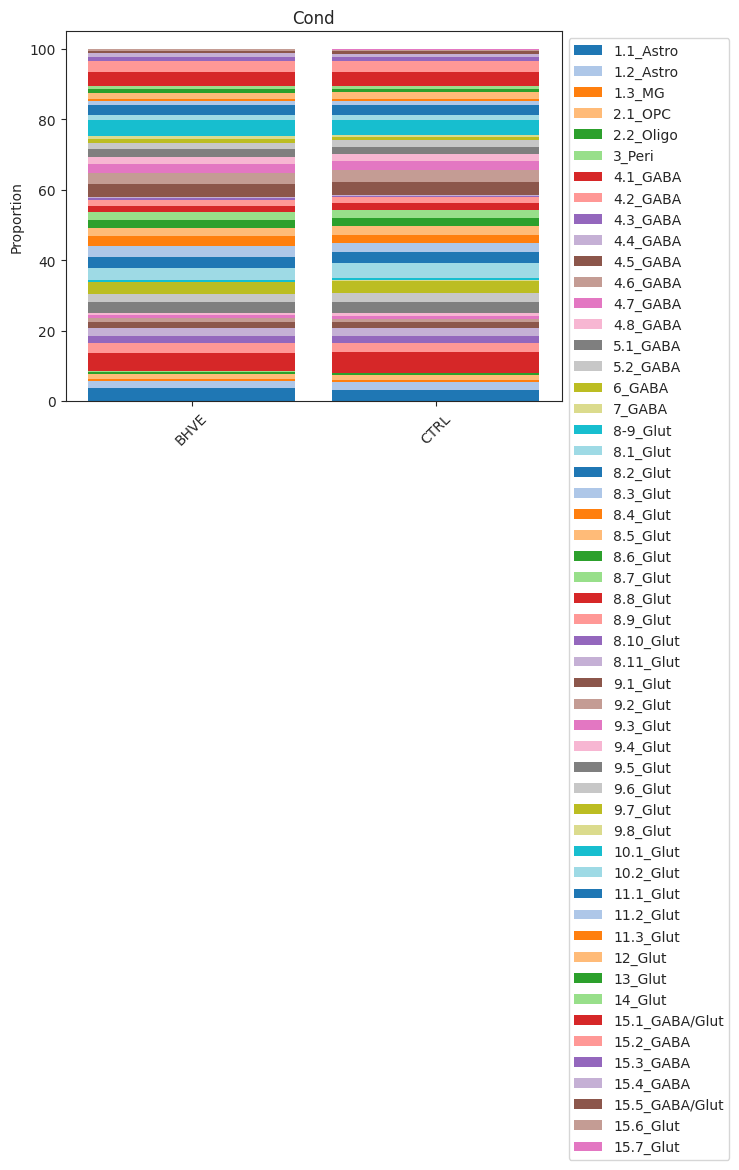

In [160]:
viz.stacked_barplot(data_scanpy_2, feature_name="Cond")
plt.show()

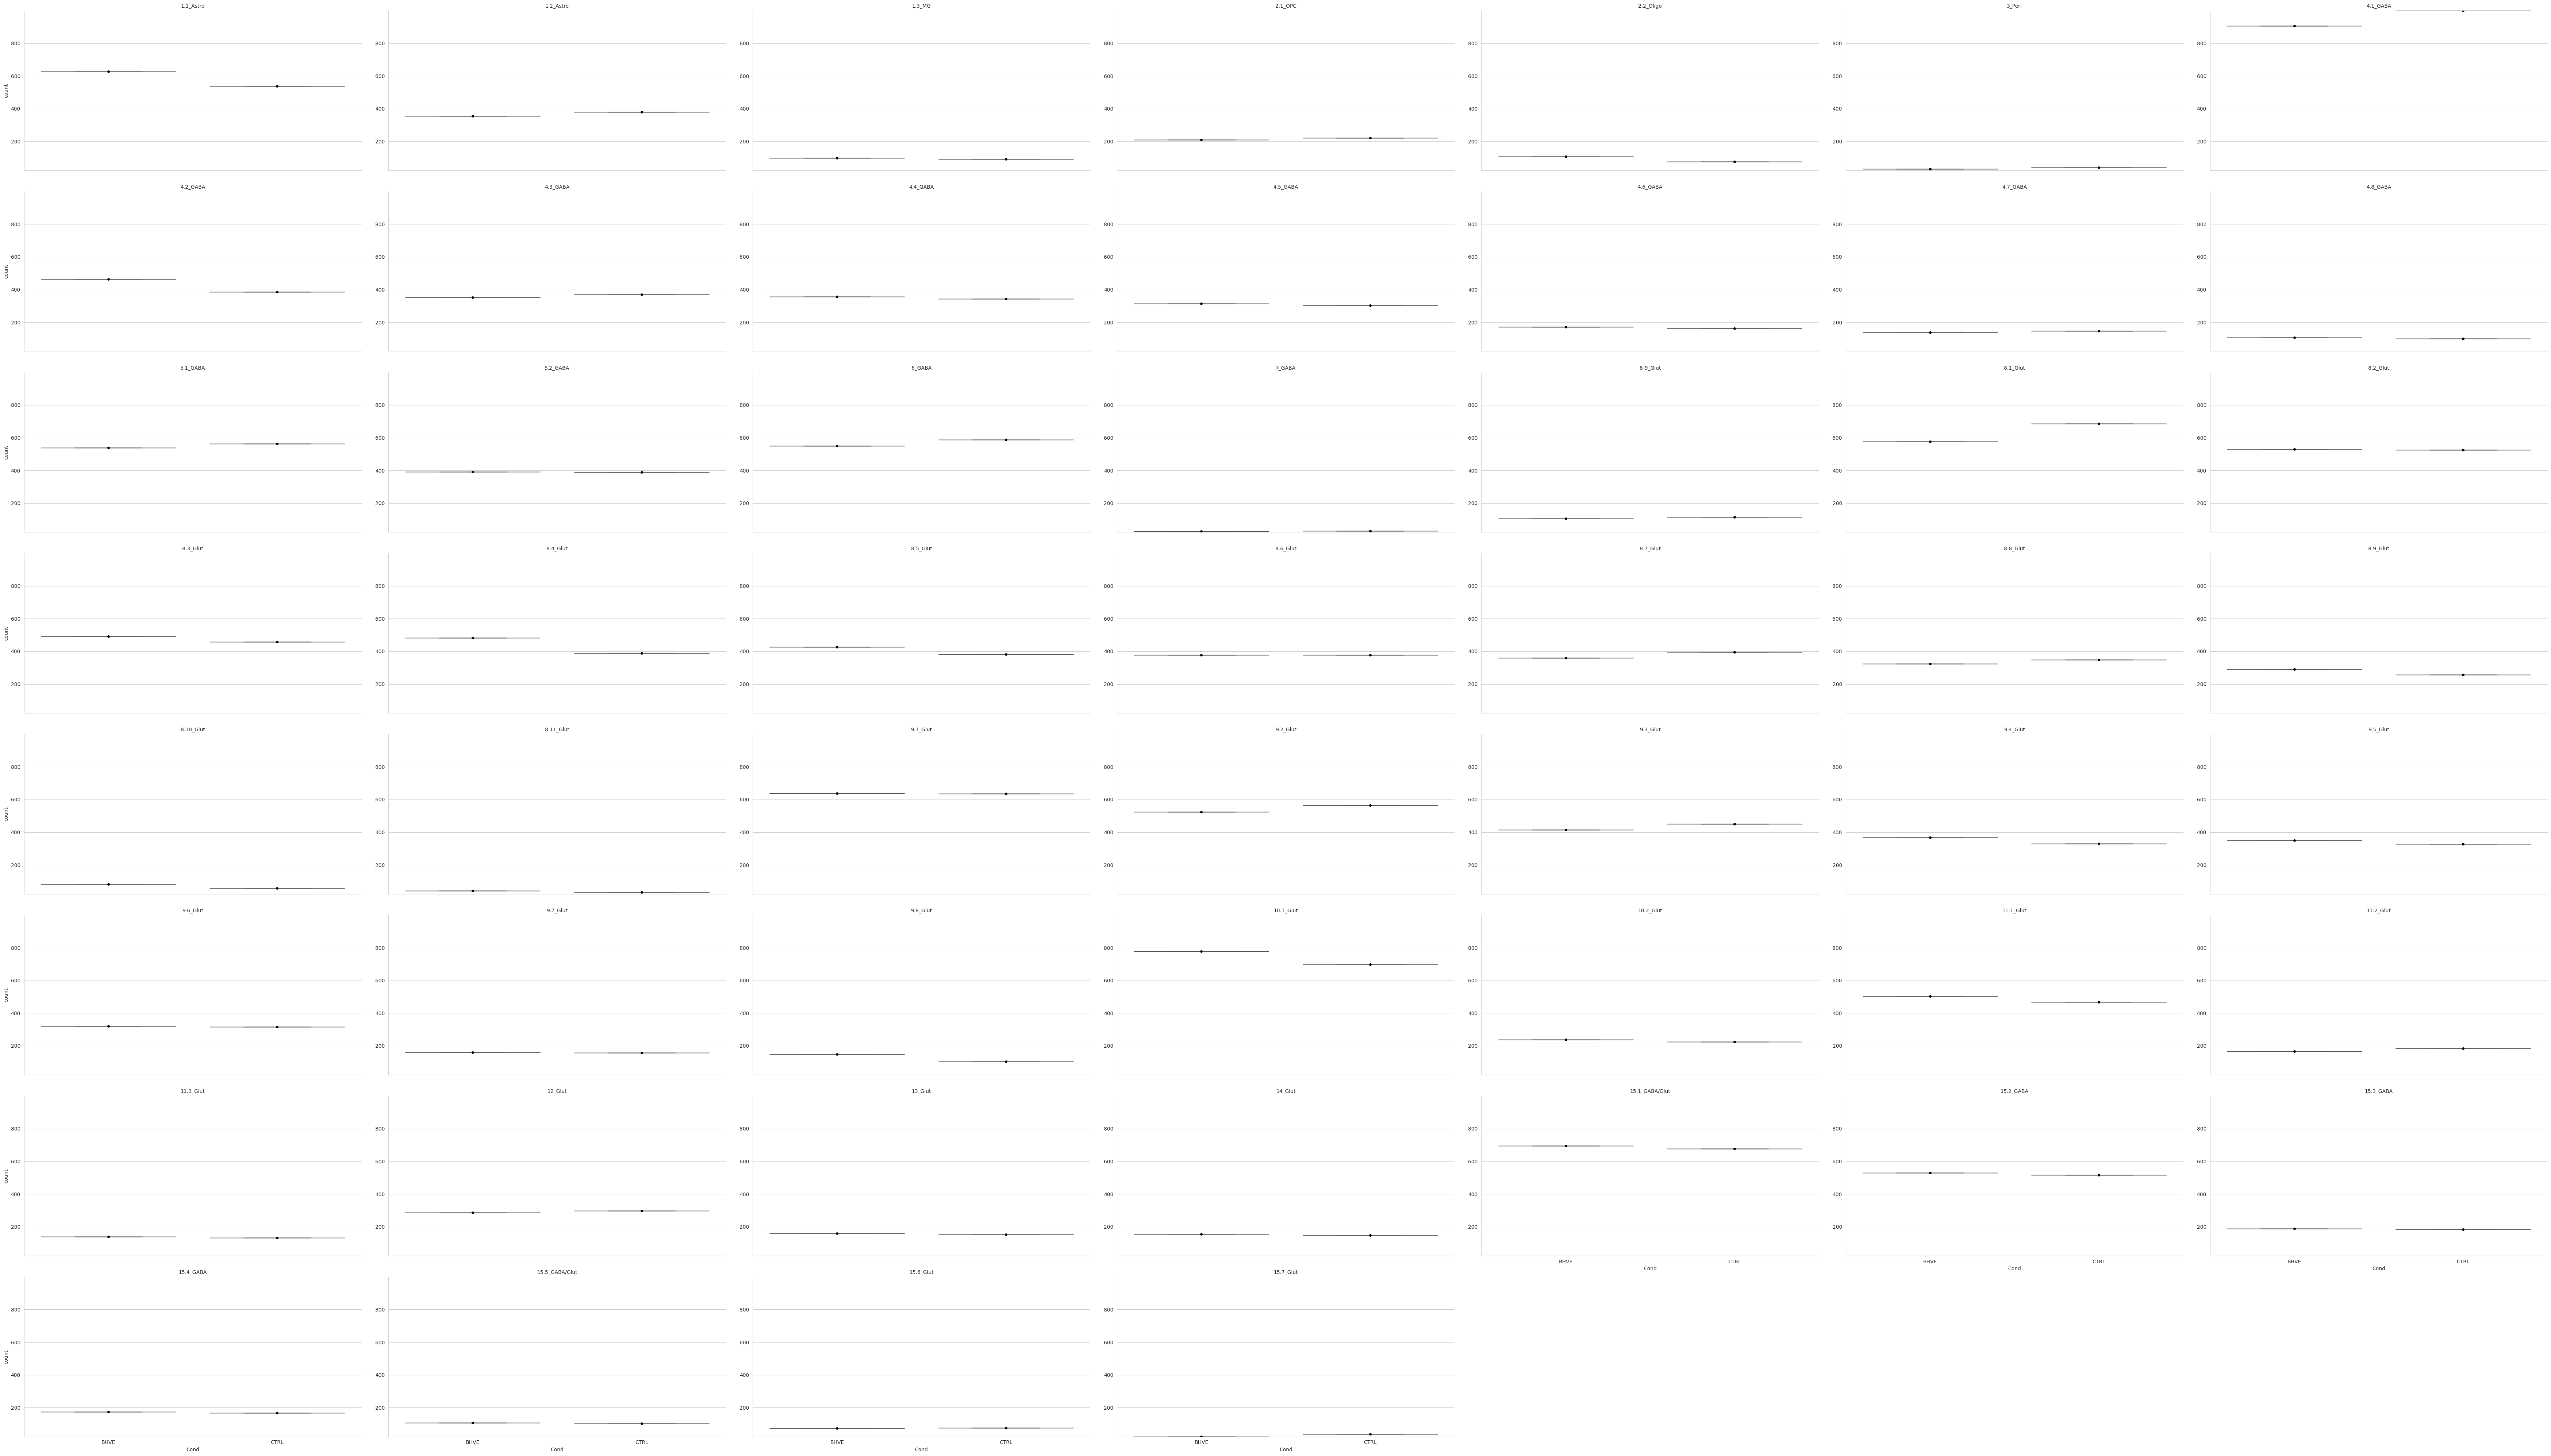

In [221]:

boxplots(
    data_scanpy_2,
    feature_name="Cond",
    plot_facets=True,
    y_scale="count",
    add_dots=True,
    cmap="Reds",
)
plt.show()

### Creating the third scCODA object (per subsample)

In [210]:
cov_df_3 = pd.DataFrame({"Cond": ['b1.1',
 'b1.2',
 'b1.3',
 'b1.4',
 'b2.1',
 'b2.2',
 'b2.3',
 'b2.4',
 'b3.1',
 'b3.2',
 'b3.3',
 'b3.4',
 'b4.1',
 'b4.2',
 'b4.3',
 'b5.1',
 'b5.2',
 'b5.3',
 'b5.4',
 'c1.1',
 'c1.2',
 'c1.3',
 'c1.4',
 'c2.1',
 'c2.2',
 'c2.3',
 'c2.4',
 'c3.1',
 'c3.2',
 'c3.3',
 'c3.4',
 'c4.1',
 'c4.2',
 'c4.3',
 'c5.1',
 'c5.2',
 'c5.3',
 'c5.4']}, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38])
print(cov_df_3)

    Cond
1   b1.1
2   b1.2
3   b1.3
4   b1.4
5   b2.1
6   b2.2
7   b2.3
8   b2.4
9   b3.1
10  b3.2
11  b3.3
12  b3.4
13  b4.1
14  b4.2
15  b4.3
16  b5.1
17  b5.2
18  b5.3
19  b5.4
20  c1.1
21  c1.2
22  c1.3
23  c1.4
24  c2.1
25  c2.2
26  c2.3
27  c2.4
28  c3.1
29  c3.2
30  c3.3
31  c3.4
32  c4.1
33  c4.2
34  c4.3
35  c5.1
36  c5.2
37  c5.3
38  c5.4


In [205]:
listy = adata.obs["subsample"].unique().tolist()
listy

['b1.1',
 'b1.2',
 'b1.3',
 'b1.4',
 'b2.1',
 'b2.2',
 'b2.3',
 'b2.4',
 'b3.1',
 'b3.2',
 'b3.3',
 'b3.4',
 'b4.1',
 'b4.2',
 'b4.3',
 'b5.1',
 'b5.2',
 'b5.3',
 'b5.4',
 'c1.1',
 'c1.2',
 'c1.3',
 'c1.4',
 'c2.1',
 'c2.2',
 'c2.3',
 'c2.4',
 'c3.1',
 'c3.2',
 'c3.3',
 'c3.4',
 'c4.1',
 'c4.2',
 'c4.3',
 'c5.1',
 'c5.2',
 'c5.3',
 'c5.4']

In [209]:
mapping = {"b1.1":1, "b1.2": 2,"b1.3":3,"b1.4":4,"b2.1":5,"b2.2":6,"b2.3":7,"b2.4":8,"b3.1":9 , "b3.2":10,"b3.3":11,"b3.4":12,"b4.1":13,
           "b4.2":14,"b4.3":15, "b5.1":16,"b5.2":17,"b5.3":18,"b5.4":19,"c1.1": 20, "c1.2": 21,"c1.3":22,"c1.4":23,"c2.1":24,"c2.2":25,"c2.3":26,"c2.4":27,"c3.1":28,"c3.2":29,"c3.3":30,"c3.4":31,"c4.1":32,
           "c4.2":33,"c4.3":34,"c5.1":35,"c5.2":36,"c5.3":37,"c5.4":38}

# Replace the values in the "cond" column using the mapping dictionary
adata.obs["cond"] = adata.obs["subsample"].replace(mapping)


In [212]:
data_scanpy_3 = dat.from_scanpy(
    adata,
    cell_type_identifier="good_names",
    sample_identifier="cond",
    covariate_df=cov_df_3
)

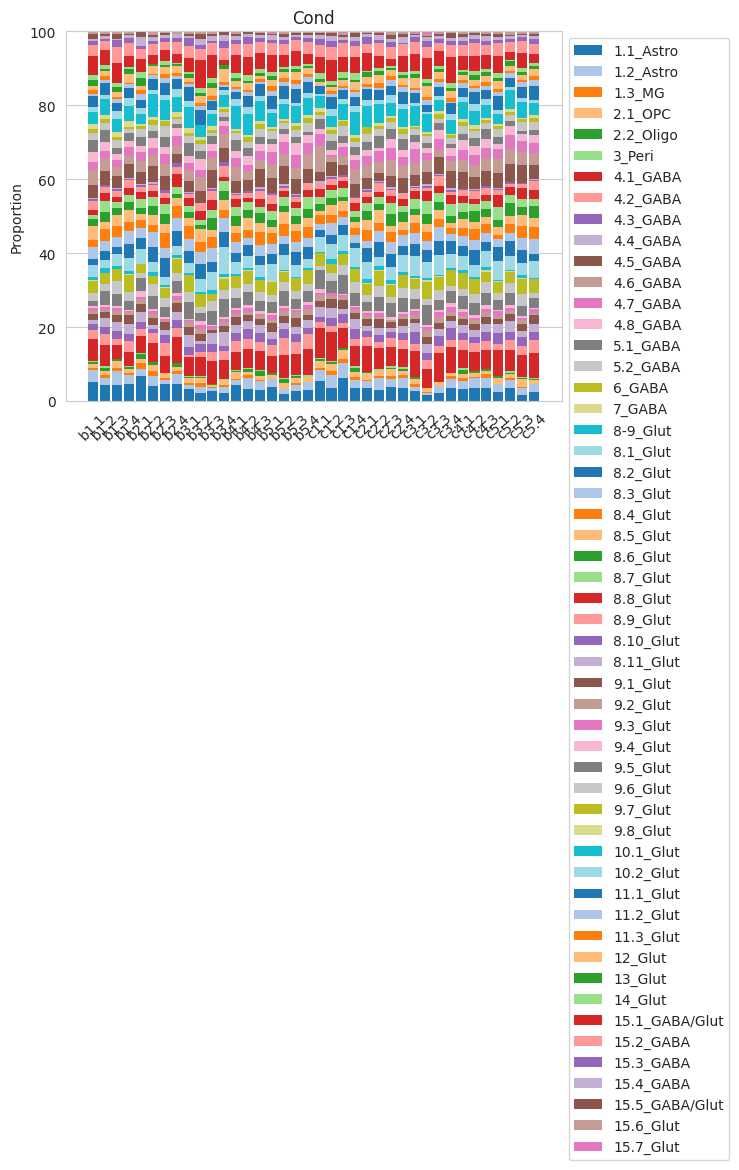

In [213]:
viz.stacked_barplot(data_scanpy_3, feature_name="Cond")
plt.show()

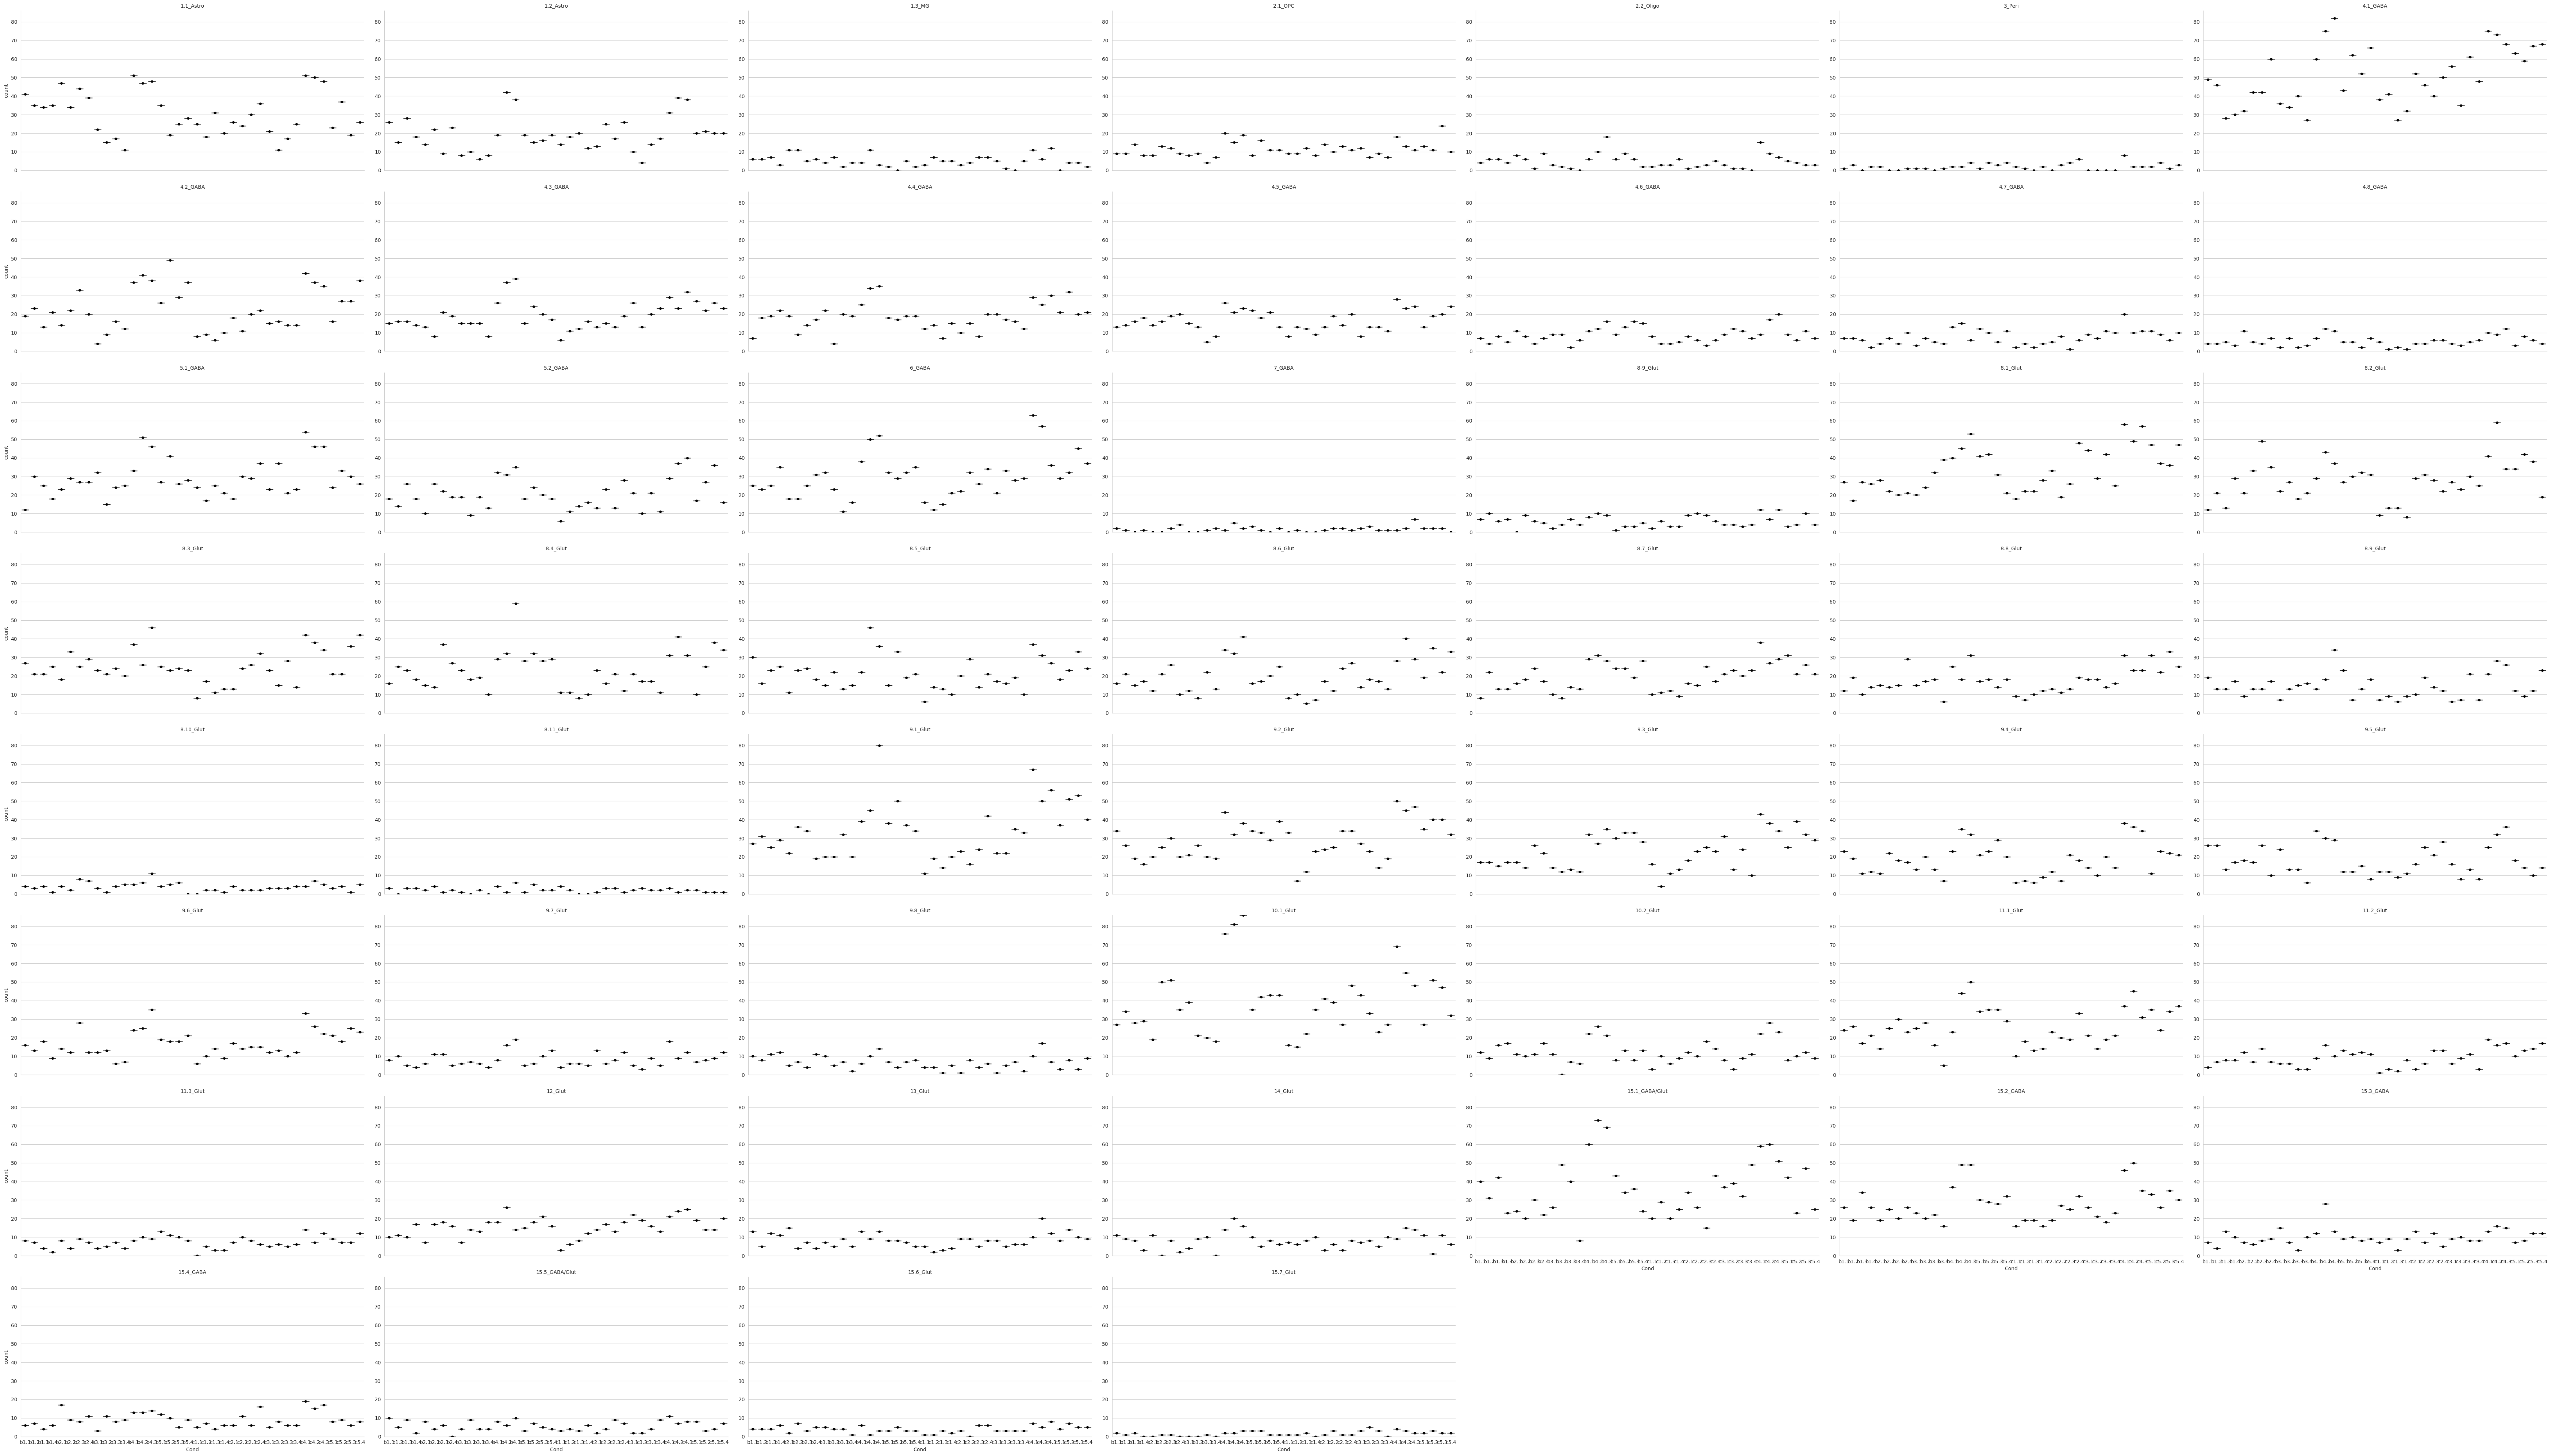

In [222]:
boxplots(data_scanpy_3,
    feature_name="Cond",
    plot_facets=True,
    y_scale="count",
    add_dots=True,
    cmap="Reds",
) 

plt.show()

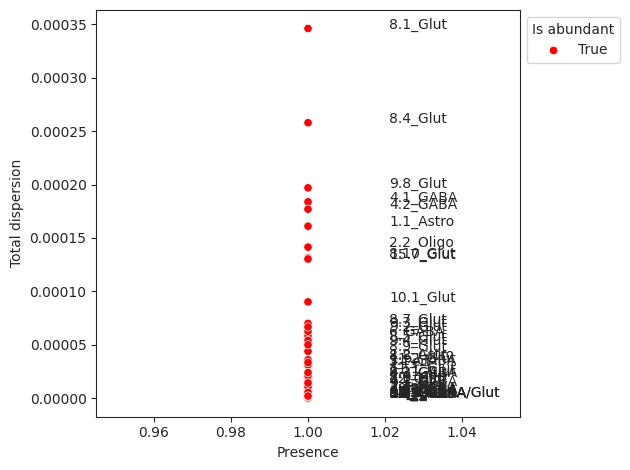

In [134]:
viz.rel_abundance_dispersion_plot(
    data=data_scanpy_1,
    abundant_threshold=0.9
)
plt.show()

In [142]:
model_all = mod.CompositionalAnalysis(data_scanpy_1, formula="Cond", reference_cell_type="8.4_Glut")
all_results = model_all.sample_hmc()
all_results.summary()

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:10<00:00, 153.29it/s]


MCMC sampling finished. (164.762 sec)
Acceptance rate: 53.9%
Compositional Analysis summary:

Data: 2 samples, 53 cell types
Reference index: 22
Formula: Cond

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
1.1_Astro                 5.444       583.872006
1.2_Astro                 4.980       367.117438
1.3_MG                    3.623        94.507745
2.1_OPC                   4.450       216.087148
2.2_Oligo                 3.582        90.711287
3_Peri                    2.646        35.576375
4.1_GABA                  5.927       946.415595
4.2_GABA                  5.124       423.978095
4.3_GABA                  4.962       360.568442
4.4_GABA                  4.935       350.963346
4.5_GABA                  4.813       310.654633
4.6_GABA                  4.191       166.781036
4.7_GABA                  4.031       142.121424
4.8_GABA                  3.706       102.686616
5.1_GABA                  5.387       551.52